# Poincaré Maps

This example demonstrates how to use PathSim's event handling system to compute **Poincaré maps** (or Poincaré sections) of chaotic dynamical systems. A Poincaré map is a powerful tool for analyzing the behavior of continuous dynamical systems by sampling the system state whenever the trajectory intersects a lower-dimensional surface.

## What are Poincaré Maps?

For a 3D system like the Lorenz attractor, the full trajectory traces out a complex path in three-dimensional space. A **Poincaré section** is created by:

1. Defining a 2D surface (or plane) in the 3D phase space
2. Recording the system state each time the trajectory crosses this surface
3. Plotting these intersection points to reveal the underlying structure

This reduces the dimensionality from 3D to 2D, making it easier to:
- Identify periodic orbits (which appear as fixed points or closed loops)
- Detect chaotic behavior (which appears as scattered but structured point clouds)
- Analyze the stability and structure of attractors

## The Lorenz System

We'll use the famous Lorenz attractor as our test case. The system consists of three coupled nonlinear ODEs:

$$\frac{dx}{dt} = \sigma(y - x)$$
$$\frac{dy}{dt} = x(\rho - z) - y$$
$$\frac{dz}{dt} = xy - \beta z$$

With the classic parameters $\sigma = 10$, $\rho = 28$, and $\beta = 8/3$ that produce chaotic behavior.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Apply PathSim docs matplotlib style for consistent, theme-friendly figures
plt.style.use('../pathsim_docs.mplstyle')

from pathsim import Simulation, Connection
from pathsim.blocks import Scope, ODE
from pathsim.solvers import RKCK54
from pathsim.events import ZeroCrossing

## Import and Setup

We'll use the compact ODE block formulation to define the Lorenz system, along with PathSim's event handling capabilities to detect surface crossings.

In [5]:
# parameters 
sigma, rho, beta = 10, 28, 8/3

# Initial conditions
xyz_0 = np.array([1.0, 1.0, 1.0])

def f_lorenz(_x, _u, t):
    x, y, z = _x
    return np.array([sigma*(y-x), x*(rho-z)-y, x*y-beta*z])

lrz = ODE(func=f_lorenz, initial_value=xyz_0)
sco = Scope(labels=["x", "y", "z"])

blocks = [lrz, sco]

connections = [
    Connection(lrz[:3], sco[:3])
    ]

## System Definition

We define the Lorenz system using an ODE block with the standard parameters and initial conditions. The Scope block will record the full trajectory for visualization.

## Defining Poincaré Sections

Now comes the key part: defining the Poincaré sections. We'll create three different sections to view the attractor from different perspectives.

### Section 1: y = 0 plane (captures x-z coordinates)

The first section is defined by the plane **y = 0**. Each time the trajectory crosses this plane, we record the x and z coordinates. This is implemented using a ZeroCrossing event:

In [8]:
pcm_xz = {"x":[], "z":[]}

def fnc_xz_evt(t):
    *_, [x, y, z] = lrz()
    return y

def fnc_xz_act(t):
    *_, [x, y, z] = lrz()
    pcm_xz["x"].append(x)
    pcm_xz["z"].append(z)

E_xz = ZeroCrossing(
    func_evt=fnc_xz_evt,
    func_act=fnc_xz_act
    )

### Section 2: x = 0 plane (captures y-z coordinates)

Similarly, we create a section at **x = 0** to record y and z coordinates:

In [11]:
pcm_yz = {"y":[], "z":[]}

def fnc_yz_evt(t):
    *_, [x, y, z] = lrz()
    return x

def fnc_yz_act(t):
    *_, [x, y, z] = lrz()
    pcm_yz["y"].append(y)
    pcm_yz["z"].append(z)

E_yz = ZeroCrossing(
    func_evt=fnc_yz_evt,
    func_act=fnc_yz_act
    )

### Section 3: z = 30 plane (captures x-y coordinates)

Finally, we create a horizontal section at **z = 30**. This plane cuts through the upper part of the attractor's "wings":

In [14]:
pcm_xy = {"x":[], "y":[]}

def fnc_xy_evt(t):
    *_, [x, y, z] = lrz()
    return z - 30

def fnc_xy_act(t):
    *_, [x, y, z] = lrz()
    pcm_xy["x"].append(x)
    pcm_xy["y"].append(y)

E_xy = ZeroCrossing(
    func_evt=fnc_xy_evt,
    func_act=fnc_xy_act
    )

### Collecting Events

We collect all three events into a list to pass to the simulation. Each event will independently monitor for its respective zero crossing and record the intersection points.

In [20]:
events = [E_xz, E_yz, E_xy]

## Simulation Setup

We create the simulation with the RKCK54 adaptive solver (similar to MATLAB's ode45). The solver's adaptive time-stepping works together with the event handling system to accurately locate each zero crossing where the trajectory intersects our Poincaré sections.

In [22]:
Sim = Simulation(
    blocks,
    connections,
    events,
    Solver=RKCK54,
    tolerance_lte_rel=1e-6,
    tolerance_lte_abs=1e-8,
    )

2025-10-15 21:08:52,916 - INFO - LOGGING (log: True)
2025-10-15 21:08:52,916 - INFO - BLOCK (type: ODE, dynamic: True, events: 0)
2025-10-15 21:08:52,916 - INFO - BLOCK (type: Scope, dynamic: False, events: 0)
2025-10-15 21:08:52,917 - INFO - GRAPH (size: 2, alg. depth: 1, loop depth: 0, runtime: 0.054ms)


## Running the Simulation

We run the simulation for 100 seconds to collect enough intersection points. The Lorenz system's chaotic behavior ensures the trajectory visits many different regions of the attractor, building up a clear picture of the Poincaré sections.

In [25]:
#run the simulation
Sim.run(100);

2025-10-15 21:08:55,725 - INFO - STARTING -> TRANSIENT (Duration: 100.00s)
2025-10-15 21:08:55,726 - INFO - TRANSIENT:   0% | elapsed: 00:00:00 (eta: --:--:--) | 0 steps (N/A steps/s)
2025-10-15 21:08:55,846 - INFO - TRANSIENT:  20% | elapsed: 00:00:00 (eta: 00:00:00) | 1213 steps (10141.1 steps/s)
2025-10-15 21:08:55,962 - INFO - TRANSIENT:  40% | elapsed: 00:00:00 (eta: 00:00:00) | 2504 steps (11121.6 steps/s)
2025-10-15 21:08:56,085 - INFO - TRANSIENT:  60% | elapsed: 00:00:00 (eta: 00:00:00) | 3908 steps (11349.6 steps/s)
2025-10-15 21:08:56,201 - INFO - TRANSIENT:  80% | elapsed: 00:00:00 (eta: 00:00:00) | 5216 steps (11298.9 steps/s)
2025-10-15 21:08:56,332 - INFO - TRANSIENT: 100% | elapsed: 00:00:00 (eta: 00:00:00) | 6711 steps (11369.5 steps/s)
2025-10-15 21:08:56,333 - INFO - TRANSIENT: 100% | elapsed: 00:00:00 (eta: 00:00:00) | 6711 steps (11042.5 avg steps/s)
2025-10-15 21:08:56,333 - INFO - FINISHED -> TRANSIENT (total steps: 6711, successful: 4932, runtime: 607.74 ms)


## Results: Poincaré Maps Visualization

Now we can visualize the results. For each plot, we show:
- The **full trajectory** (semi-transparent line) projected onto the 2D plane
- The **Poincaré section points** (gray dots) showing where the trajectory intersects the respective plane

### Interpreting the Poincaré Maps

The Poincaré maps reveal the attractor's **fractal structure**:

- **x-y section (z = 30)**: Shows two distinct point clouds corresponding to the two lobes of the butterfly
- **y-z sections (x = 0)**: Reveals the characteristic curved structure as the trajectory switches between lobes
- **x-z sections (y = 0)**: Displays a similar curved pattern, showing the vertical extent of the attractor

The scattered yet structured appearance of these points is a signature of **deterministic chaos**. The points are not random—they trace out a complex geometric structure called a **strange attractor**. If we were to simulate longer, these point clouds would become denser but would never fill the entire 2D space; instead, they reveal the attractor's intricate, self-similar geometry.

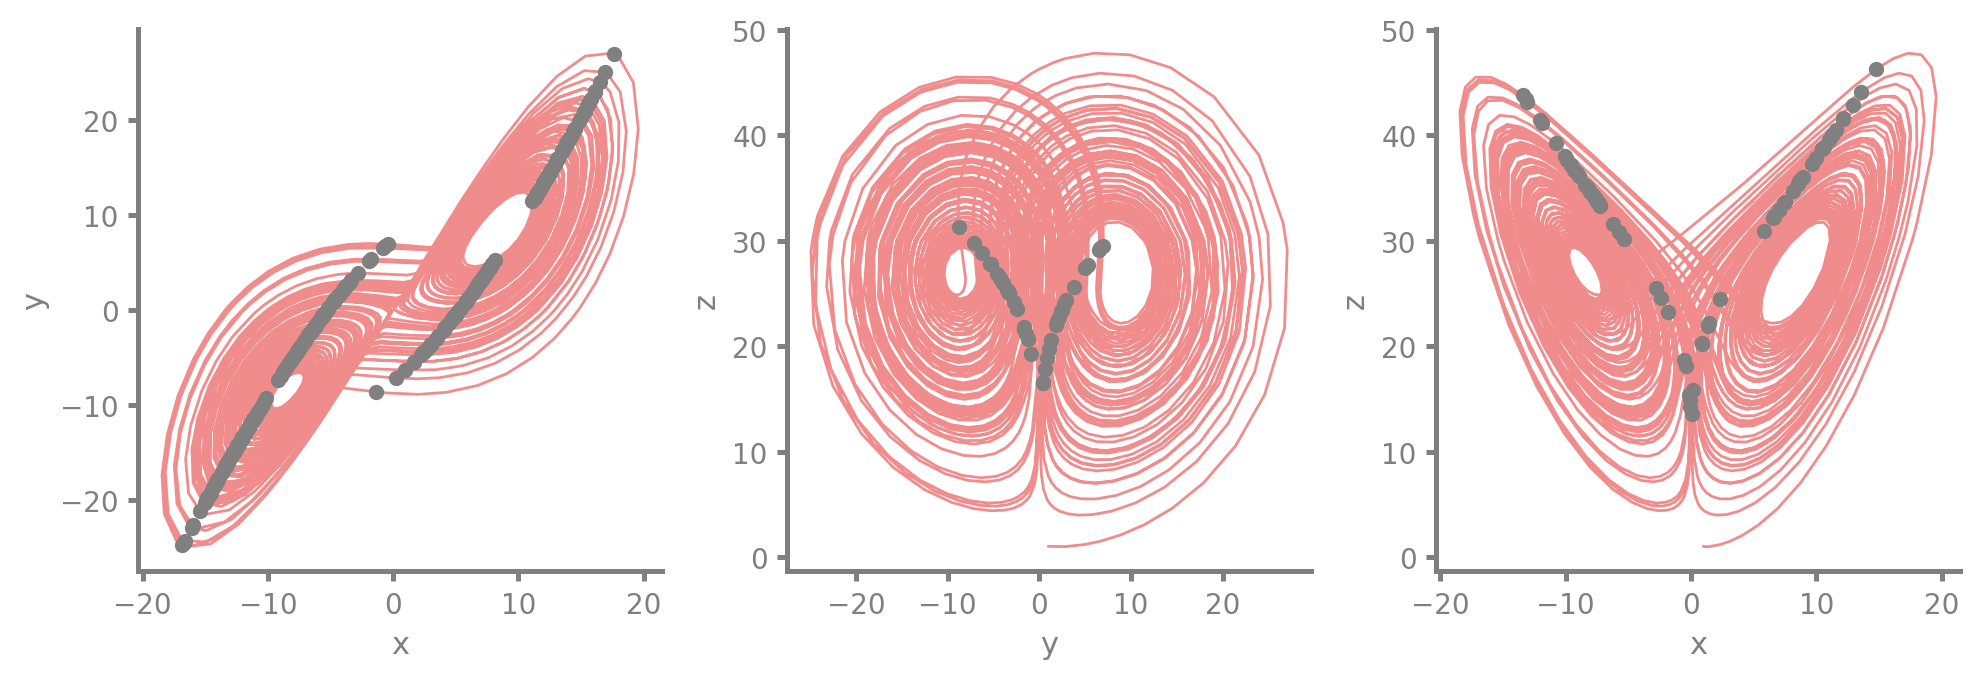

In [29]:
time, [x, y, z] = sco.read()

fig, ax = plt.subplots(ncols=3, figsize=(10, 3.5), tight_layout=True, dpi=200)

# x-y-slice
ax[0].plot(x, y, lw=1, alpha=0.5)
ax[0].plot(pcm_xy["x"], pcm_xy["y"], ".", c="gray")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

# y-z-sclice
ax[1].plot(y, z, lw=1, alpha=0.5)
ax[1].plot(pcm_yz["y"], pcm_yz["z"], ".", c="gray")
ax[1].set_xlabel("y")
ax[1].set_ylabel("z")

# x-z-sclice
ax[2].plot(x, z, lw=1, alpha=0.5)
ax[2].plot(pcm_xz["x"], pcm_xz["z"], ".", c="gray")
ax[2].set_xlabel("x")
ax[2].set_ylabel("z");